In [1]:
# import system libraries
import sys
import os
import glob

# import Data Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                        

%matplotlib inline

# Set paths for custom modules
sys.path.insert(0, './helpers')
sys.path.insert(0, './models')

# Image Loader functions
# from image_loader import image_transforms
# from image_loader import images_from_dir
# from image_loader import image_data_loader
from image_loader import dir_loader_stack
from image_loader import csv_loader_stack
from image_loader import image_plot

# Model Functions
from resnet50 import Resnet50_pretrained

from model_helpers import train
from model_helpers import predict


# torch temp
import torch.nn as nn
import torch.optim as optim
import torch

### Data From CSV Example

In [2]:
# Labels from CSV

df_lab = pd.read_csv('../datasets/animals/labels.csv')
df_lab.head()


,FilePath,Label
0,cats/cats_00072.jpg,cat
1,cats/cats_00073.jpg,cat
2,cats/cats_00074.jpg,cat
3,cats/cats_00075.jpg,cat
4,cats/cats_00076.jpg,cat


In [3]:
df_lab.shape

(2850, 2)

In [4]:
# params

img_size = 244
batch_size = 32
num_workers = 0

# Dataset folder
data_dir = '../datasets/animals/'

# # Set subfolders for train, val & test
# train_dir = os.path.join(data_dir, 'train/')
# val_dir = os.path.join(data_dir, 'valid/')
# test_dir = os.path.join(data_dir, 'test/')

In [5]:
# train test split
# Train & val


In [6]:
train_loader = csv_loader_stack(data_dir,df_lab, 'FilePath', 'Label',
                        img_size,batch_size,num_workers,True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


cat


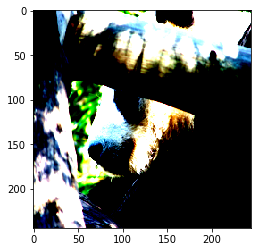

In [7]:
# Check how images are loaded
images, labels = next(iter(train_loader))

# Display image and label
plt.imshow(images[0].permute(1, 2, 0))
print(labels[8])

In [8]:
import torchvision.transforms as transforms


In [9]:
# def image_plot(generator):
#             testX_sanity, testY_sanity = next(iter(generator))

#             L = 3
#             W = 3

#             fig, axes = plt.subplots(L,W,figsize=(12,12))
#             axes = axes.ravel()
            
#             mean = (0.485, 0.456, 0.406)
#             std = (0.229, 0.224, 0.225)
#             norm = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
#                                         std=[1/0.229, 1/0.224, 1/0.255])
            

#             for i in np.arange(0, L*W):
#                 img_norm = norm(testX_sanity[i])
#                 axes[i].imshow(img_norm.permute(1, 2, 0))

#                 axes[i].set_title('{}'.format(testY_sanity[i]))
#                 axes[i].axis('off')
#             plt.subplots_adjust(hspace = 0)
#             plt.show()
#             plt.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


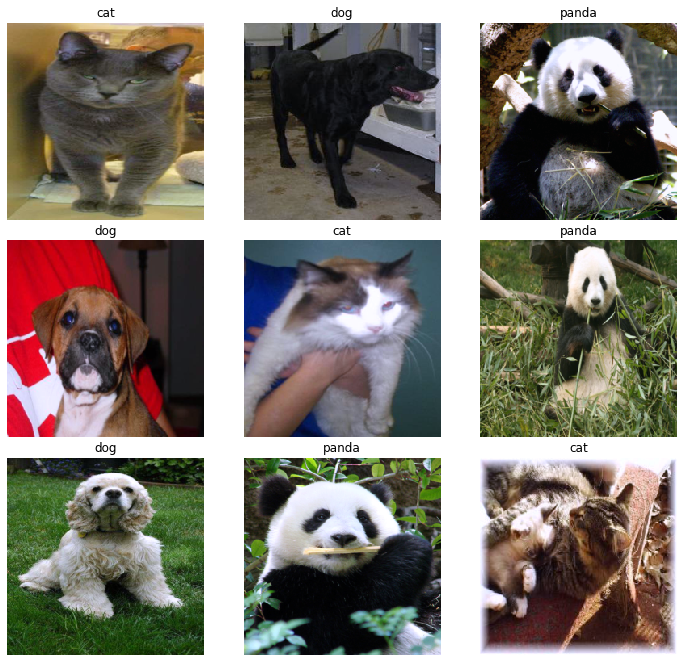

In [10]:
image_plot(train_loader)

In [11]:
break

SyntaxError: 'break' outside loop (<ipython-input-11-6aaf1f276005>, line 4)

In [ ]:
# train_loader = dir_loader_stack(train_dir, img_size,
#                                batch_size, num_workers, True)

# val_loader = dir_loader_stack(val_dir, img_size,
#                                batch_size, num_workers)

# test_loader = dir_loader_stack(test_dir, img_size,
#                                batch_size, num_workers)


In [ ]:
data_loaders = {
    'train':train_loader,
    'valid':val_loader,
    'test':test_loader,
}

In [ ]:
# Model Parms
num_classes = 3
device = 'cuda'

In [ ]:
# create model from object

In [ ]:
res_model = Resnet50_pretrained(num_classes)

In [ ]:
res_model = res_model.build()

In [ ]:
# Train Model

In [ ]:
# Train Params
n_epochs = 1
learn_rate = 0.001
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(res_model.fc.parameters(), lr=learn_rate)

device = 'cuda'
save_path = 'test_train.pt'

In [ ]:
# model = train(res_model, n_epochs, data_loaders, optimizer,
#                     criterion, device, save_path)

In [ ]:
# refactor to functions

In [ ]:
# train the model
model_transfer = res_model.train(n_epochs, data_loaders, optimizer_transfer, criterion_transfer, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
# res_model.load_state_dict(torch.load('model_transfer_dog_breeds.pt'))
# res_model.eval()

In [ ]:
# getimages image folder
images = glob.glob("images/*")

In [ ]:
for image in images:
    predict(res_model,image,device)